In [16]:
import os
import xarray as xr
import geopandas as gpd  # type: ignore
from dotenv import load_dotenv
import sqlalchemy as sq
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../Shared/")
from DataService import DataService  

In [17]:
# loading environment variables
load_dotenv()
PG_USER = os.getenv("POSTGRES_USER")
PG_PW = os.getenv("POSTGRES_PW")
PG_DB = os.getenv("POSTGRES_DB")
PG_ADDR = os.getenv("POSTGRES_ADDR")
PG_PORT = os.getenv("POSTGRES_PORT")

if (
    PG_DB is None
    or PG_ADDR is None
    or PG_PORT is None
    or PG_USER is None
    or PG_PW is None
):
    # updateLog(LOG_FILE, "Missing database credentials")
    raise ValueError("Environment variables not set")

In [18]:
db = DataService(PG_DB, PG_ADDR, int(PG_PORT), PG_USER, PG_PW)
conn = db.connect()

In [19]:
# query to pull agg_soil_moisture from database
query = sq.text("select * FROM public.agg_soil_moisture")
sm_df = pd.read_sql(query, conn)

In [20]:
query = sq.text("select * FROM public.agg_ergot_samples")
ergot_df = pd.read_sql(query, conn)

In [21]:
db.cleanup()

In [22]:
# sm_df.drop(columns=['index', 'day', 'month', 'cr_num'], inplace=True)
sm_df.drop(columns=['index'], inplace=True)

In [23]:
sm_df

,year,month,day,cr_num,district,soil_moisture_min
0,1978,11,1,3,4612,0.165900
1,1978,11,1,5,4740,0.127140
2,1978,11,1,5,4741,0.153398
3,1978,11,1,7,4770,0.140772
4,1978,11,1,7,4771,0.116810
...,...,...,...,...,...,...
341876,2021,12,27,10,4870,0.248699
341877,2021,12,28,3,4612,0.243087
341878,2021,12,28,10,4860,0.140860
341879,2021,12,28,10,4870,0.167391


<Axes: xlabel='year', ylabel='soil_moisture_min'>

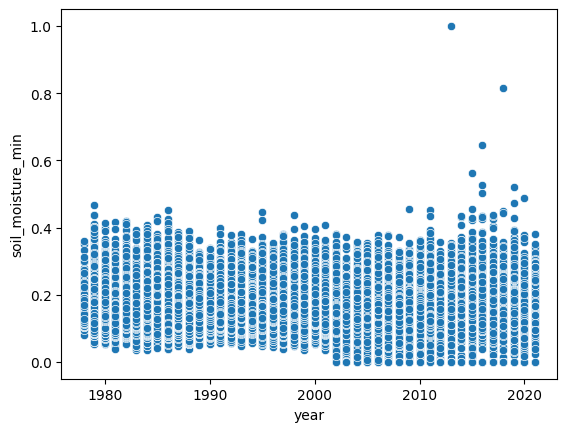

In [25]:
sns.scatterplot(sm_df, x = sm_df["year"], y = sm_df["soil_moisture_min"])

/tmp/ipykernel_598012/3363013862.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sm_df['soil_moisture_min'])


<Axes: xlabel='soil_moisture_min', ylabel='Density'>

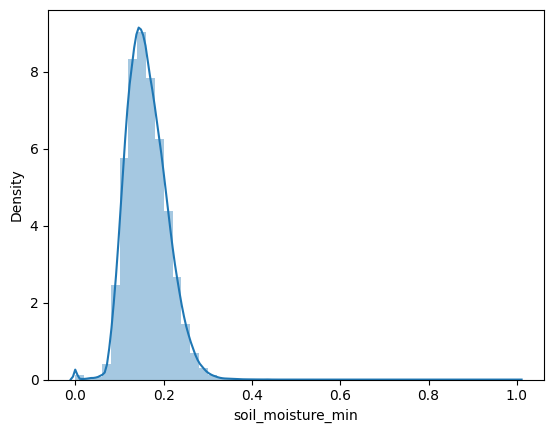

In [26]:
sns.distplot(sm_df['soil_moisture_min'])

In [27]:
df = ergot_df.merge(sm_df, on=["year", "district"], how="inner")

In [28]:
df.sample(5)

,year,district,percnt_true,has_ergot,sum_severity,present_prev1,present_prev2,present_prev3,present_in_neighbor,severity_prev1,severity_prev2,severity_prev3,severity_in_neighbor,month,day,cr_num,soil_moisture_min
184520,2015,4731,0.127660,True,0.08,True,True,True,True,0.112903,0.142857,0.073529,0.380000,6,11,4,0.153138
38991,1999,4609,0.058824,True,0.16,True,True,True,True,0.041667,0.043210,0.064039,0.053512,5,17,1,0.154072
114817,2007,4609,0.071429,True,0.04,True,True,False,True,0.018519,0.160000,0.000000,0.033333,10,6,1,0.232474
134081,2009,4741,1.000000,True,0.00,False,False,True,True,0.000000,0.000000,0.013699,0.984848,5,1,5,0.131971
43384,1999,4781,0.296188,True,1.78,True,True,True,True,0.019841,0.014245,0.003704,0.269650,4,30,6,0.171473


<Axes: xlabel='year', ylabel='soil_moisture_min'>

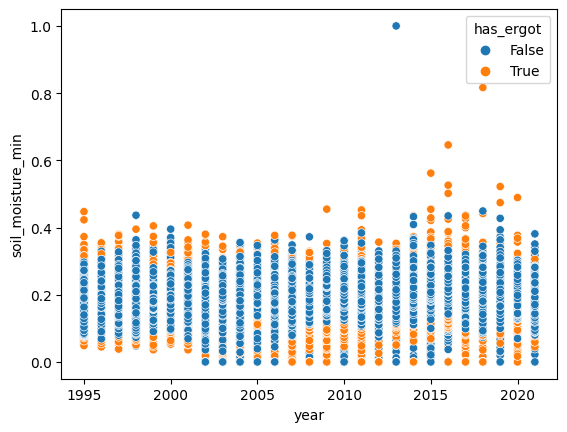

In [30]:
sns.scatterplot(df, x = df["year"], y = df["soil_moisture_min"], hue="has_ergot")

<Axes: xlabel='has_ergot', ylabel='soil_moisture_min'>

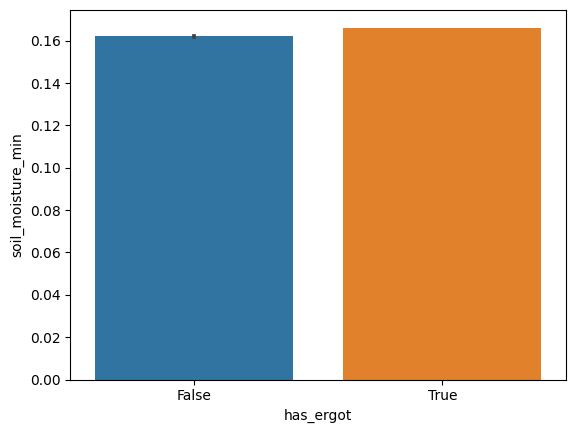

In [31]:
sns.barplot(x = df["has_ergot"], y = df["soil_moisture_min"])

<Axes: xlabel='has_ergot', ylabel='soil_moisture_min'>

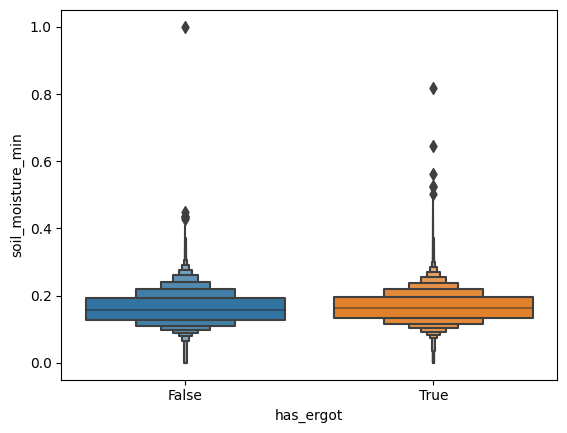

In [32]:
sns.boxenplot(x=df["has_ergot"], y=df["soil_moisture_min"])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238539 entries, 0 to 238538
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  238539 non-null  int64  
 1   district              238539 non-null  int64  
 2   percnt_true           238539 non-null  float64
 3   has_ergot             238539 non-null  bool   
 4   sum_severity          238539 non-null  float64
 5   present_prev1         238539 non-null  bool   
 6   present_prev2         238539 non-null  bool   
 7   present_prev3         238539 non-null  bool   
 8   present_in_neighbor   238539 non-null  bool   
 9   severity_prev1        238539 non-null  float64
 10  severity_prev2        238539 non-null  float64
 11  severity_prev3        238539 non-null  float64
 12  severity_in_neighbor  238539 non-null  float64
 13  month                 238539 non-null  int64  
 14  day                   238539 non-null  int64  
 15  

In [34]:
# sns.pairplot(df, hue="has_ergot")

In [35]:
df.describe()

,year,district,percnt_true,sum_severity,severity_prev1,severity_prev2,severity_prev3,severity_in_neighbor,month,day,cr_num,soil_moisture_min
count,238539.000000,238539.000000,238539.000000,238539.000000,238539.000000,238539.000000,238539.000000,238539.000000,238539.000000,238539.000000,238539.000000,238539.000000
mean,2007.738416,4723.729457,0.141134,2.112837,0.141396,0.129976,0.126204,0.150648,7.163952,15.825731,5.130599,0.165164
std,7.708971,86.617318,0.211682,12.011171,0.214568,0.210218,0.209554,0.201184,2.342818,8.841341,2.563742,0.046345
min,1995.000000,4601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,2001.000000,4611.000000,0.009091,0.010000,0.006006,0.000000,0.000000,0.023847,5.000000,8.000000,3.000000,0.131591
50%,2007.000000,4733.000000,0.058201,0.112000,0.056497,0.043478,0.038760,0.074747,7.000000,16.000000,5.000000,0.161847
75%,2014.000000,4781.000000,0.190476,0.520000,0.190840,0.169811,0.164384,0.208417,9.000000,24.000000,7.000000,0.195557
max,2021.000000,4870.000000,1.000000,268.000000,1.000000,1.000000,1.000000,1.000000,12.000000,31.000000,10.000000,1.000000
